In [1]:
import math

In [2]:
"""Q1 A"""
"""This function return the mean, standard deviation, number of elements in list/vector""" 
def calculateStatistics(listOne, type):
    mean = 0.0
    standardDeviation = 0.0
    size = len(listOne)
    
    #Calculates sample mean of list
    mean = sum(listOne)/size

    #Calculates sample standard deviation of list
    for i in range(0, size): #First calculates variance
        standardDeviation += pow((listOne[i] - mean), 2)
    if(type == "sample"):
        standardDeviation = standardDeviation/(size-1)
    else:
        standardDeviation = standardDeviation/(size)
    standardDeviation = math.sqrt(standardDeviation)

    return mean, standardDeviation, size

In [3]:
theList = [5.99342831, 4.7234714 , 6.29537708, 8.04605971, 4.53169325,
4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009]

mean, standardDeviation, size = calculateStatistics(theList, "population")

print(mean)
print(standardDeviation)
print(size)

5.896122225000001
1.3718118594538566
10


In [57]:
"""Q1 B"""
"""This method prints if a gene is goof or bad  depending on if the the mean has a statistically significant differnece using population mean"""

def calculateZStat(sampleList, populationMean):

    threshold = 4.000 # Number of standard deviations
    p = 0.0001 # In this scenario we are saying that there is more than a 1/10000 change that a certain gene expresses

    sampleMean, sampleStandardDeviation, sampleSize = calculateStatistics(sampleList, "sample")

    print("Sample Statistics")
    print("Mean: " + str(sampleMean) + " Sample Standard Deviation: " + str(sampleStandardDeviation) + " Size of data: " + str(sampleSize))

    #Next calculate Z statistic
    zStat = (sampleMean - populationMean)/(sampleStandardDeviation/math.sqrt(sampleSize))
    if(abs(zStat) > threshold):
        print("This gene is a bad gene with greater than the change of " + str(p) + " of expressing with a Z statistic of " + str(zStat))
    else:
        print("This gene is a good gene with smaller than the change of " + str(p) + " of expressing with a Z statistic of " + str(zStat))


In [58]:
sampleList = [5.99342831, 4.7234714 , 6.29537708, 8.04605971, 4.53169325,
4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009]

populationMean = 0.01

calculateZStat(sampleList, populationMean)

Sample Statistics
Mean: 5.896122225000001 Sample Standard Deviation: 1.4460166657016584 Size of data: 10
This gene is a bad gene with greater than the change of 0.0001 of expressing with a Z statistic of 12.872294807270526


In [59]:
"""Q1 B"""
"""This method prints if a gene is goof or bad  depending on if the the mean has a statistically significant differnece using population list"""

def calculateZStat(sampleList, populationList):

    threshold = 4.000 # Number of standard deviations
    p = 0.0001 # In this scenario we are saying that there is more than a 1/10000 change that a certain gene expresses

    sampleMean, sampleStandardDeviation, sampleSize = calculateStatistics(sampleList, "sample")
    populationMean, populationStandardDeviation, populationSize = calculateStatistics(populationList, "population")

    print("Sample Statistics")
    print("Mean: " + str(sampleMean) + " Sample Standard Deviation: " + str(sampleStandardDeviation) + " Size of data: " + str(sampleSize))

    print("Population Statistics")
    print("Mean: " + str(populationMean) + " Sample Standard Deviation: " + str(populationStandardDeviation) + " Size of data: " + str(populationSize))

    #Next calculate Z statistic
    zStat = (sampleMean - populationMean)/(populationStandardDeviation/math.sqrt(populationSize))
    if(abs(zStat) > threshold):
        print("This gene is a bad gene with greater than the change of " + str(p) + " of expressing with a Z statistic of " + str(zStat))
    else:
        print("This gene is a good gene with smaller than the change of " + str(p) + " of expressing with a Z statistic of " + str(zStat))


In [60]:
sampleList = [5.99342831, 4.7234714 , 6.29537708, 8.04605971, 4.53169325,
4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009]
    
populationList = [5.99342831, 4.7234714 , 6.29537708, 8.04605971, 4.53169325,
4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009]

calculateZStat(sampleList, populationList)

Sample Statistics
Mean: 5.896122225000001 Sample Standard Deviation: 1.4460166657016584 Size of data: 10
Population Statistics
Mean: 5.896122225000001 Sample Standard Deviation: 1.3718118594538566 Size of data: 10
This gene is a good gene with smaller than the change of 0.0001 of expressing with a Z statistic of 0.0


In [62]:
import pandas as pd
import math

In [63]:
"""Q1 C"""
"""This class looks through the CSV file given and checks to see if the genes are bad or good using the previously defined hypothesis test"""
class TestGenes:

    def calculateZStat(self, sampleList, populationList):
            sampleMean = 0.0
            sampleSize = len(sampleList)
            populationMean = 0.0
            populationStandardDeviation = 0.0
            populationSize = len(populationList)

            #Calculates sample mean of list
            sampleMean = sum(sampleList)/sampleSize

            #Calculates population mean of list
            populationMean = sum(populationList)/populationSize

            #Calculates sample standard deviation of list
            for i in range(0, populationSize): #First calculates variance
                populationStandardDeviation += pow((populationList[i] - populationMean), 2)
            populationStandardDeviation = populationStandardDeviation/(populationSize)
            populationStandardDeviation = math.sqrt(populationStandardDeviation)

            #Next calculate Z statistic
            zStat = (sampleMean - populationMean)/(populationStandardDeviation/math.sqrt(populationSize))
            return zStat

    def runTests(self):
            df = self.data
            threshold = 4.000 # Number of standard deviations
            p = 0.0001 # In this scenario we are saying that there is more than a 1/10000 change that a certain gene expresses
            zStat = 0
            rows = len(df)
            columns = len(df.columns)
            count1 = 0
            count2 = 0
            name = ""
            sampleNumber = "sample_"
            sampleList = []
            populationList = []

            for i in range(0, rows):
                temp = df[i:i+1].values.tolist() # Getting the data ready
                populationList = temp[0][1:columns]
                name = temp[0][0]

                for x in range(1, columns):
                    sampleList = temp[0][x:x+1]
                    zStat = self.calculateZStat(sampleList, populationList) # Going through every sample and gene
                    if(abs(zStat) > threshold):
                        print(name + " of " + sampleNumber + " " + str(x-1) + " " + "is a bad gene with greater than the change of " + str(p) + " of expressing with a Z statistic of " + str(zStat))
                        count1+=1
                    else:
                        print(name + " of " + sampleNumber + " " + str(x-1) + " " + "is a good gene with smaller than the change of " + str(p) + " of expressing with a Z statistic of " + str(zStat))
                        count2+=1
            print(f"Number of bad genes is {count1}")
            print(f"Number of good genes is {count2}")

    def __init__(self):
        self.data = pd.read_csv(r'/home/romiovictor123/Desktop/EDIT/technical_data/1_c_d.csv')

In [64]:
test = TestGenes()

test.runTests()

gene_0 of sample_ 0 is a bad gene with greater than the change of 0.0001 of expressing with a Z statistic of 5.524963702949469
gene_0 of sample_ 1 is a good gene with smaller than the change of 0.0001 of expressing with a Z statistic of 0.6671806485888839
gene_0 of sample_ 2 is a bad gene with greater than the change of 0.0001 of expressing with a Z statistic of 6.6799647973950975
gene_0 of sample_ 3 is a bad gene with greater than the change of 0.0001 of expressing with a Z statistic of 13.37659866716957
gene_0 of sample_ 4 is a good gene with smaller than the change of 0.0001 of expressing with a Z statistic of -0.06640064622802232
gene_0 of sample_ 5 is a good gene with smaller than the change of 0.0001 of expressing with a Z statistic of -0.06627504513942388
gene_0 of sample_ 6 is a bad gene with greater than the change of 0.0001 of expressing with a Z statistic of 13.806415812710586
gene_0 of sample_ 7 is a bad gene with greater than the change of 0.0001 of expressing with a Z sta

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

"""Q1 D"""
"""This method takes data from a CSV file and plots them so we can see if there is a correlation"""
def makeGraphs(data1, data2):
    labels = [data1[0][0], data2[0][0]]
    data1 = data1[0][1:]
    data2 = data2[0][1:]

    plt.scatter(data1, data2, color='orange') #2 vs 5 is one
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(labels[0] + " vs. " + labels[1])
    plt.show()

Select which genes you want to see in a graph.
Selectable genes: gene_0, gene_1, gene_2, gene_3, gene_4, gene_5, gene_6, gene_7


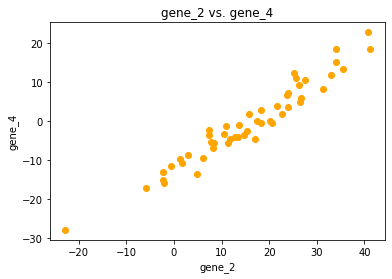

In [66]:
data1 = pd.read_csv(r'/home/romiovictor123/Desktop/EDIT/technical_data/1_c_d.csv')
data2 = pd.read_csv(r'/home/romiovictor123/Desktop/EDIT/technical_data/1_c_d.csv')

print("Select which genes you want to see in a graph.")
print("Selectable genes: gene_0, gene_1, gene_2, gene_3, gene_4, gene_5, gene_6, gene_7")
geneList = list(input("Input two genes like '07' with no space in between. No other method will be accepted."))

if((len(geneList) > 2) or (int(geneList[0]) > 7) or (int(geneList[1]) > 7)):
    print("Please input correctly.")
else:
    data1 = data1[int(geneList[0]):int(geneList[0])+1].values.tolist()
    data2 = data2[int(geneList[1]):int(geneList[1])+1].values.tolist()

    makeGraphs(data1, data2) # 24

In [ ]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import io
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [67]:
"""Bonus Question 1 Part A"""
"""This method graphs the data from the CSV file"""
"""ALL occurs in children and AML occurs in adults"""
def graphFunction(data):
    labels = data.iloc[:,0]
    data = data.drop(data.columns[0], axis=1)

    for i in range(len(labels)): # Removes index from row
        labels[i] = labels[i][-3:]

    model = TSNE(n_components=2, random_state=15)

    tsne_data = model.fit_transform(data)
    tsne_data = np.vstack((tsne_data.T, labels)).T

    tsne_df = pd.DataFrame(data=tsne_data, columns=("Patient", "Expression", "label"))

    patientData = tsne_df.iloc[:,0].to_numpy()
    expressionData = tsne_df.iloc[:,1].to_numpy()
    labelData = tsne_df.iloc[:,2].to_numpy()

    cdict = {"ALL": 'orange', "AML": 'blue'}
    
    fig, ax = plt.subplots()
    for g in np.unique(labelData):
        ix = np.where(labelData == g)
        ax.scatter(patientData[ix], expressionData[ix], c = cdict[g], label = g) # Add labels and title

    plt.xlabel("Patient")
    plt.ylabel("Expression")
    plt.title("Patient vs Expression")

    ax.legend()
    plt.show()

In [69]:
"""Bonus Question 1 Part B"""
"""This method runs a KMeans algorithm so that we can predict the type of Leukemia"""
def classifyData(data):
    # Prep for model
    labels = data.iloc[:,0]    
    for i in range(len(labels)): # Removes index from row
        labels[i] = labels[i][-3:]
    data = data.drop(data.columns[0], axis=1)
    x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2, random_state=15)

    trainReady = scale(x_train)
    testReady = scale(x_test)
    
    # Creating model
    clustering = KMeans(n_clusters=2,random_state=15)
    model = clustering.fit(trainReady)
    
    #Verifying model
    # 0 is ALL
    # 1 is AML
    prediction = model.predict(x_test)
    correct = 0      

    correctLabels = y_test.values.tolist()
    for i in range(len(correctLabels)):
        if(correctLabels[i] == "ALL"):
            correctLabels[i] = 0
        else:
            correctLabels[i] = 1

    for i in range(len(prediction)):
        if(prediction[i] == correctLabels[i]):
            correct = correct + 1
    return (correct/len(y_test))

<ipython-input-67-098749f12c12>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] = labels[i][-3:]


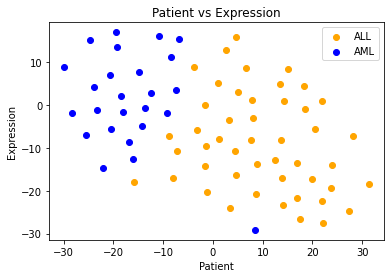

<ipython-input-69-67a5b838bef9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] = labels[i][-3:]
0.8666666666666667


In [70]:
data = pd.read_csv(r'/home/romiovictor123/Desktop/EDIT/technical_data/2_a.csv', header=None)

graphFunction(data)
print(classifyData(data))